In [1]:
import pandas as pd

df = pd.read_csv("AusApparalSales4thQrt2020.csv")
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [2]:
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [3]:
#task 1-a
print("Missing Values in each column: ")
print(df.isna().sum())

print("\n Non-missing values in each column: ")
print(df.notna().sum())

Missing Values in each column: 
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

 Non-missing values in each column: 
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [4]:
#Taks 1-b
df.dropna(how='all',inplace=True)
df.info()

df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Sales']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


0       20000
1       20000
2       10000
3       37500
4        7500
        ...  
7555    35000
7556    37500
7557    37500
7558    27500
7559    32500
Name: Sales, Length: 7560, dtype: int64

In [5]:
#Task 1-c
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Sales','Unit']]=scaler.fit_transform(df[['Sales','Unit']])
df[['Sales','Unit']]

,Sales,Unit
0,0.095238,0.095238
1,0.095238,0.095238
2,0.031746,0.031746
3,0.206349,0.206349
4,0.015873,0.015873
...,...,...
7555,0.190476,0.190476
7556,0.206349,0.206349
7557,0.206349,0.206349
7558,0.142857,0.142857


In [6]:
#Taks 1-d
State_Sales= df.groupby("State")["Sales"].sum().reset_index()
print(State_Sales)

State_Sales.sort_values(by="Sales", ascending=False)

  State       Sales
0   NSW  441.714286
1    NT  109.079365
2   QLD  177.888889
3    SA  339.412698
4   TAS  110.222222
5   VIC  635.968254
6    WA  106.365079


,State,Sales
5,VIC,635.968254
0,NSW,441.714286
3,SA,339.412698
2,QLD,177.888889
4,TAS,110.222222
1,NT,109.079365
6,WA,106.365079


In [7]:
#task 2-a

print(df[["Sales", "Unit"]].describe())

print(df[["Sales", "Unit"]].mode())

             Sales         Unit
count  7560.000000  7560.000000
mean      0.254054     0.254054
std       0.204784     0.204784
min       0.000000     0.000000
25%       0.095238     0.095238
50%       0.190476     0.190476
75%       0.380952     0.380952
max       1.000000     1.000000
      Sales      Unit
0  0.111111  0.111111


In [8]:
#Task 2-b & 2-c
top_sales_group = df.groupby("Group")["Sales"].sum().idxmax()

bottom_sales_group = df.groupby("Group")["Sales"].sum().idxmin()

print(f"Highest Sales by Group: {top_sales_group}")
print(f"Lowest Sales by Group: {bottom_sales_group}")

Highest Sales by Group:  Men
Lowest Sales by Group:  Seniors


In [9]:
#Task 2-D
df['Date']= pd.to_datetime(df['Date'])

df['Week']= df['Date'].dt.isocalendar().week
df['Month']= df['Date'].dt.month
df['Quarter']= df['Date'].dt.quarter

In [25]:
#Weekly Sales Report
Weekly_sales =df.groupby("Week")["Sales"].sum().reset_index()
print(weekly_sales)

#Monthy Sales Report
Monthly_sales =df.groupby("Month")["Sales"].sum().reset_index()
print(Monthly_sales)

#Quarter Sales Report
Quarterly_sales =df.groupby("Quarter")["Sales"].sum().reset_index()
print(Quarterly_sales)

    Week       Sales
0     40   84.857143
1     41  152.777778
2     42  150.476190
3     43  151.587302
4     44  122.460317
5     45  113.809524
6     46  115.761905
7     47  115.380952
8     48  117.698413
9     49  169.412698
10    50  181.492063
11    51  182.317460
12    52  183.047619
13    53   79.571429
   Month       Sales
0     10  645.650794
1     11  495.761905
2     12  779.238095
   Quarter        Sales
0        4  1920.650794


In [26]:
#Task 3-a
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")

%matplotlib inline

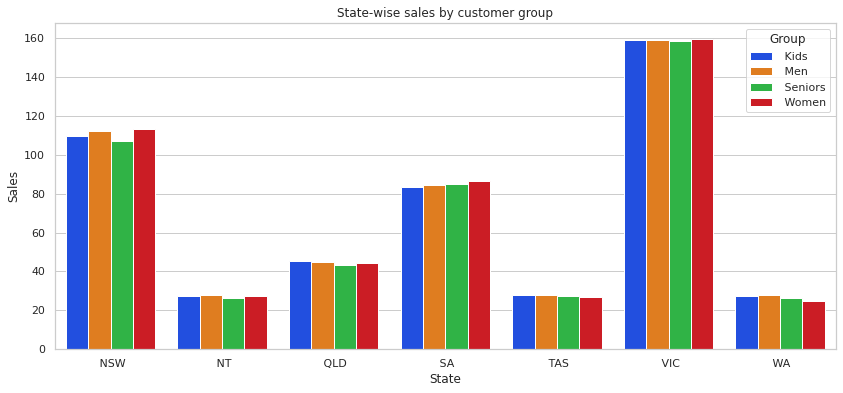

In [27]:
#taks 3-a-1

state_group_sales = df.groupby(['State', 'Group']) ['Sales'].sum().reset_index()
plt.figure(figsize=(14, 6))

sns.barplot(data=state_group_sales, x='State', y='Sales', hue='Group', palette='bright')
plt.title("State-wise sales by customer group")
plt.show()

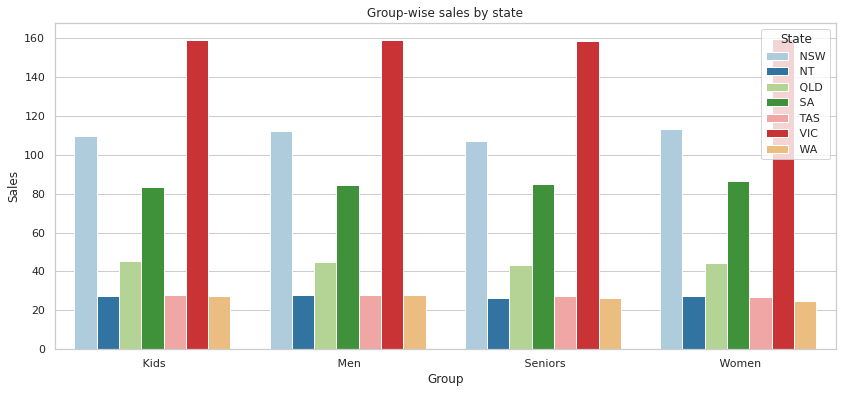

In [28]:
#taks 3-a-2

group_state_sales = df.groupby(['Group', 'State']) ['Sales'].sum().reset_index()
plt.figure(figsize=(14, 6))

sns.barplot(data=group_state_sales, x='Group', y='Sales', hue='State',palette='Paired')
plt.title("Group-wise sales by state")
plt.show()

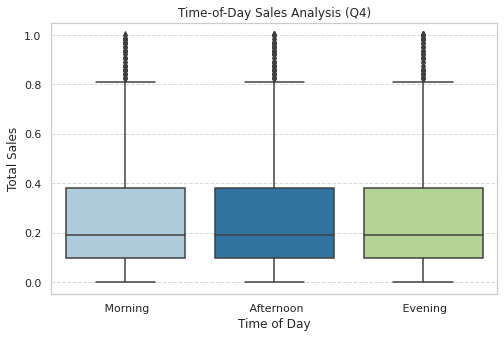

In [29]:
#Task 3-a-3

plt.figure(figsize=(8, 5))

sns.boxplot(data=df, x="Time", y="Sales", palette='Paired')  
plt.title("Time-of-Day Sales Analysis (Q4)")
plt.xlabel("Time of Day")  
plt.ylabel("Total Sales")  

plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

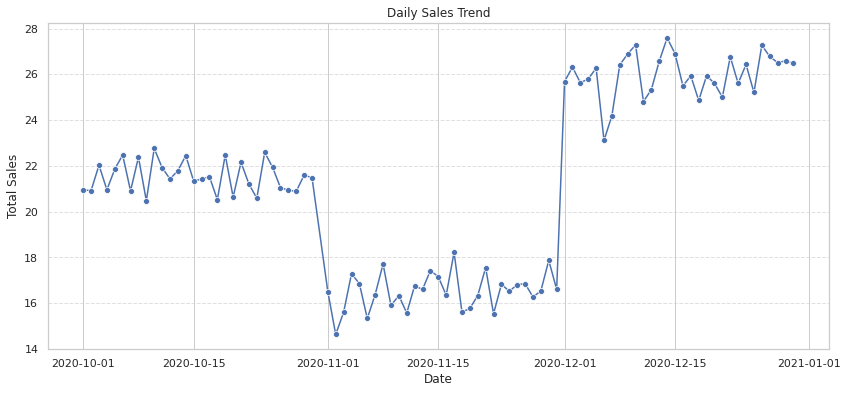

In [32]:
#Task 3-b Daily sales

daily_sales = df.groupby('Date')['Sales'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='Date', y='Sales', marker='o')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

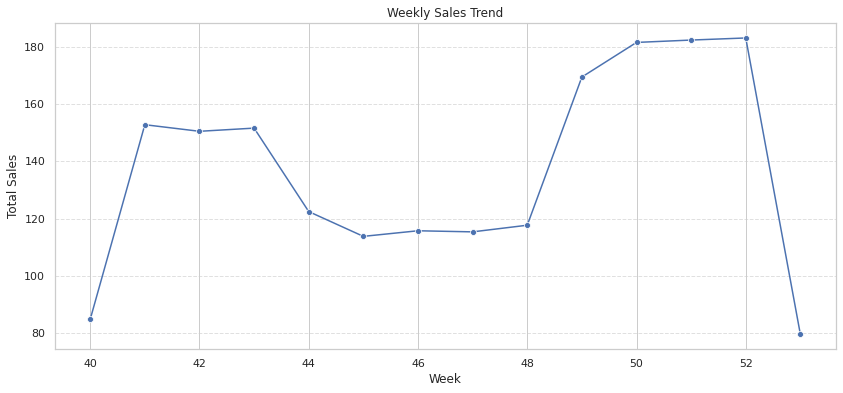

In [35]:
#Task 3-b # weekly sales

plt.figure(figsize=(14, 6))
sns.lineplot(data=Weekly_sales, x='Week', y='Sales', marker='o', estimator=None)
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

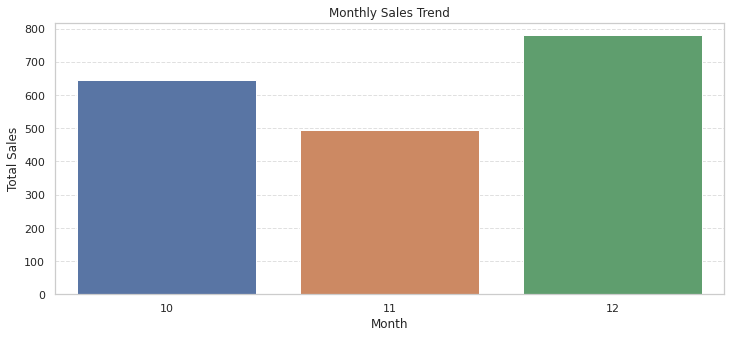

In [36]:
#Task 3-b # Monthly sales

plt.figure(figsize=(12, 5))
sns.barplot(data=Monthly_sales, x='Month', y='Sales')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

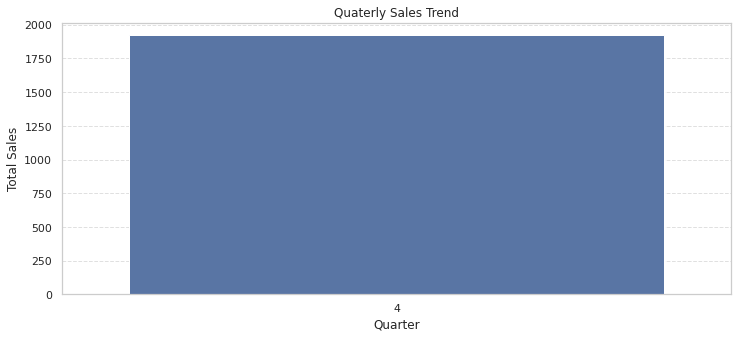

In [38]:
#Task 3-b # Quarterly sales

plt.figure(figsize=(12, 5))
sns.barplot(data=Quarterly_sales, x='Quarter', y='Sales')
plt.title("Quaterly Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Task 3C: Recommendation – Visualization Package
For this project, the recommended visualization package is Seaborn.

Reason:
Seaborn is built on top of Matplotlib and provides:

* Clean and professional plots with minimal code.
* Better support for statistical visualizations (bar plots, box plots, line plots).
* Readable styles and built-in themes, making the charts clear for business dashboards.

👉 Therefore, Seaborn is the preferred choice for building the sales analysis dashboard in this project.

In [40]:
# Task 4: Report Generation
report = """
Sales Analysis Report (Q4)

1. State-wise Sales Analysis:
- Top states: VIC
- Lowest performing states: WA

2. Sales Distribution by Group:
- Highest sales category: Men
- Lowest sales category: Seniors

3. Time-of-Day Sales Analysis:
- Peak hours: Morning
- Off-peak hours: Afternoon

4. Sales Trends:
- Daily: Sales fluctuations throughout Q4
- Weekly: Identified high and low sales weeks
- Monthly: Sales trends for each month in Q4
- Quarterly: Overall Q4 sales comparison by state

Recommendations:
- Optimize inventory for peak hours
- Improve marketing strategies in low-sales states
- Leverage Q4 sales trends for better promotions
"""
print(report)


Sales Analysis Report (Q4)

1. State-wise Sales Analysis:
- Top states: VIC
- Lowest performing states: WA

2. Sales Distribution by Group:
- Highest sales category: Men
- Lowest sales category: Seniors

3. Time-of-Day Sales Analysis:
- Peak hours: Morning
- Off-peak hours: Afternoon

4. Sales Trends:
- Daily: Sales fluctuations throughout Q4
- Weekly: Identified high and low sales weeks
- Monthly: Sales trends for each month in Q4
- Quarterly: Overall Q4 sales comparison by state

Recommendations:
- Optimize inventory for peak hours
- Improve marketing strategies in low-sales states
- Leverage Q4 sales trends for better promotions

